In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import joblib 

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
pd.set_option('display.max_columns', None)

# Loading datasets

In [3]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
0,0.121212,0.18750,0.394705,0.325923,0.0,0.0,0.0,0.50,0.500000,0.491606,0.051867,0.565217,0.0,0.307692,0.857739,0.201163,0.589897,1.0,0.363636,0.933333,0.0,0.818182
1,0.090909,0.18750,0.405596,0.327905,0.0,0.0,0.0,0.50,0.500000,0.562964,0.000000,0.530435,0.0,0.307692,0.986239,0.183278,0.544952,0.0,0.181818,0.533333,1.0,0.545455
2,0.151515,0.34375,0.582438,0.289762,0.4,0.0,0.0,0.50,0.666667,0.744138,0.000000,0.913043,0.0,0.807692,0.823433,0.424382,0.792008,0.0,0.636364,0.333333,0.0,0.636364
3,0.060606,0.12500,0.322738,0.256842,0.0,0.0,0.0,0.75,0.500000,0.466276,0.000000,0.078261,0.0,0.596154,0.539395,0.227139,0.594254,0.0,0.727273,0.833333,0.0,0.363636
4,0.060606,0.12500,0.365339,0.582515,0.0,0.0,0.0,0.50,0.500000,0.517006,0.000000,0.539130,0.0,0.903846,0.583825,0.464978,0.799262,0.0,0.545455,0.300000,0.0,0.727273


In [4]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,price
0,12.899220
1,12.971540
2,13.487006
3,12.880292
4,13.132314


# Loading the pre selected features

In [5]:
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

print(features)

['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'day', 'year', 'month_name']


# Selecting the feature we got in feature selection

In [6]:
X_train = X_train[features]
X_test = X_test[features]

# Different Models

## Lasso Regression

In [7]:
lin_model = Lasso(alpha=0.001, random_state=0) # Setting the seed

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

### Evaluating the model

In [8]:
# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2

# We transformed y_train and y_test with np.log()
# So inorder to make convert it into original value use np.exp() on y_train and y_test

print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 28742627637
train rmse: 169536
train r2: 0.7850166888072745

test mse: 33803927668
test rmse: 183858
test r2: 0.753780704070587

Average house price:  450000


### Evaluating the predictions with respect to real price

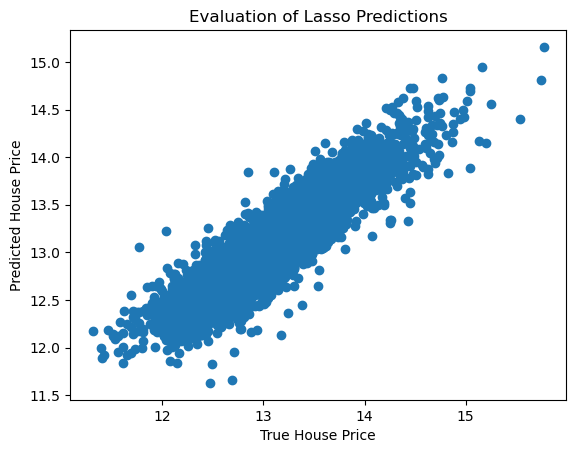

In [9]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

plt.show()

### Let's see output is following the Normal Distribution or not

In [10]:
y_test.reset_index(drop=True)

# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))
preds

0       12.806830
1       14.013782
2       13.083758
3       12.997392
4       13.580645
          ...    
6479    13.329778
6480    13.092119
6481    12.632122
6482    12.685753
6483    12.480833
Length: 6484, dtype: float64

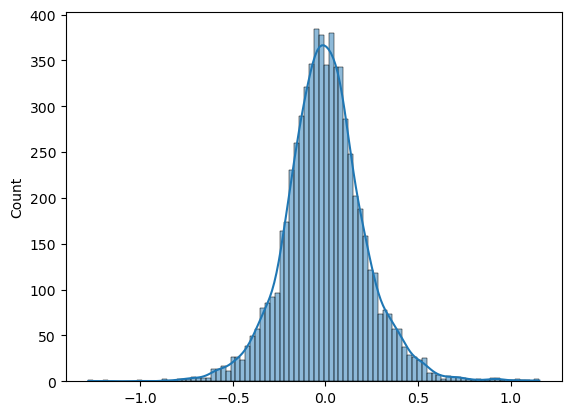

In [11]:
# let's evaluate the distribution of the errors: they should be fairly normally distributed
sns.histplot(y_test['price'] - preds, kde=True)

plt.show()

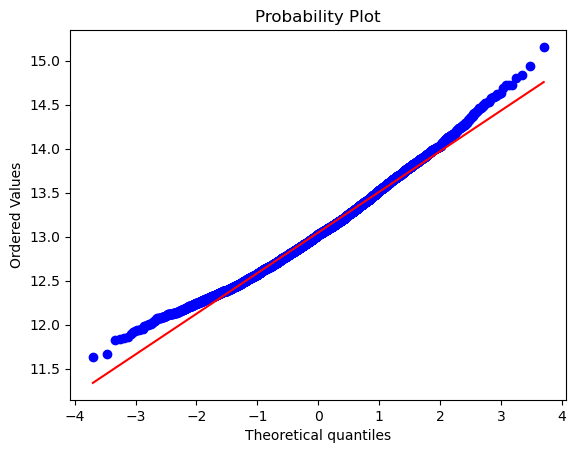

In [12]:
import scipy.stats as stats

res = stats.probplot(pred, plot=plt)
plt.show()

### Feature Importance 

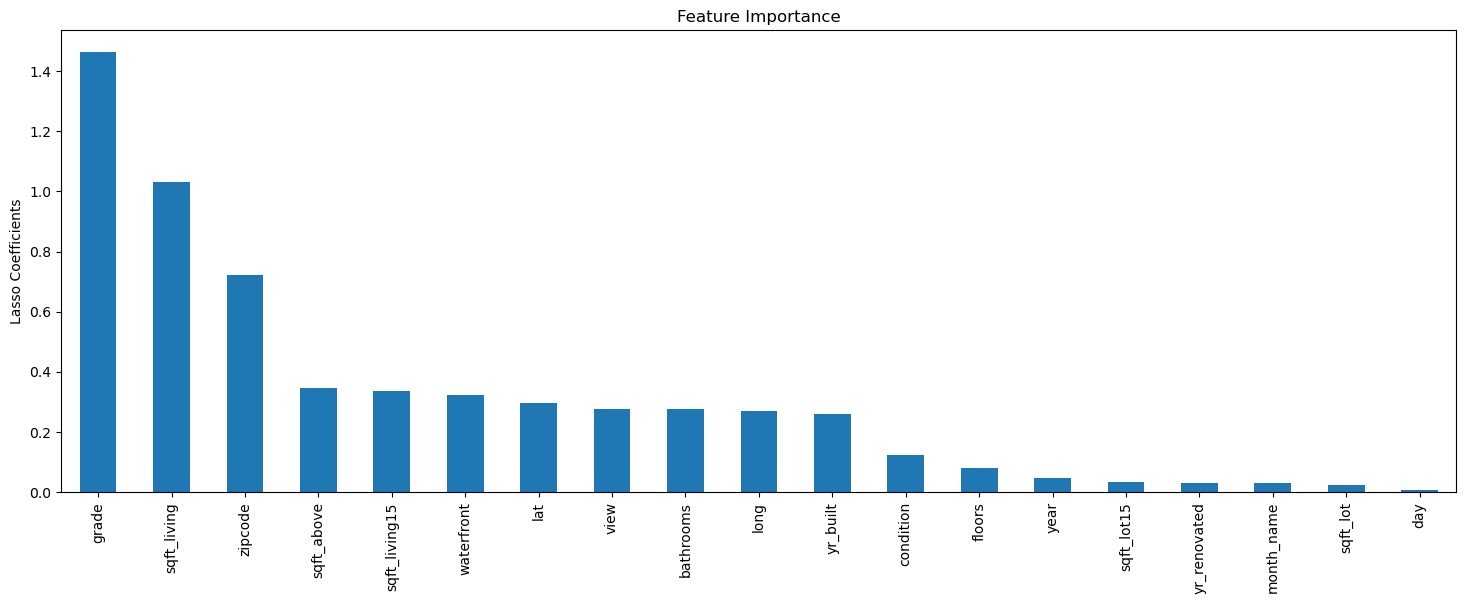

In [13]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

plt.show()

### Save the model

In [14]:
joblib.dump(lin_model, 'lasso_regression.joblib')

['lasso_regression.joblib']

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)

### Evaluating the model

In [17]:

# make predictions for train set
pred = regressor.predict(X_train)

# determine mse, rmse and r2

# We transformed y_train and y_test with np.log()
# So inorder to make convert it into original value use np.exp() on y_train and y_test

print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = regressor.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 26701965017
train rmse: 163407
train r2: 0.8002800256432054

test mse: 31293194464
test rmse: 176898
test r2: 0.7720682524268017

Average house price:  450000


### Evaluating the predictions with respect to real price

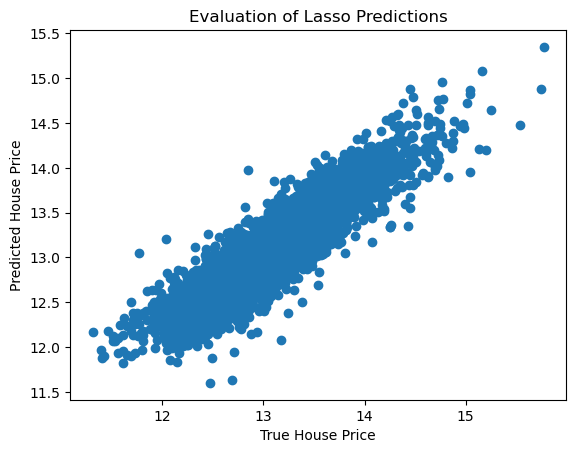

In [18]:
plt.scatter(y_test, regressor.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

plt.show()

### Let's see output is following the normal distribution or not

In [19]:
y_test.reset_index(drop=True)

# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(regressor.predict(X_test).flatten())
preds

0       12.779823
1       14.081931
2       13.061020
3       12.995466
4       13.586406
          ...    
6479    13.346173
6480    13.076008
6481    12.651541
6482    12.666585
6483    12.465980
Length: 6484, dtype: float64

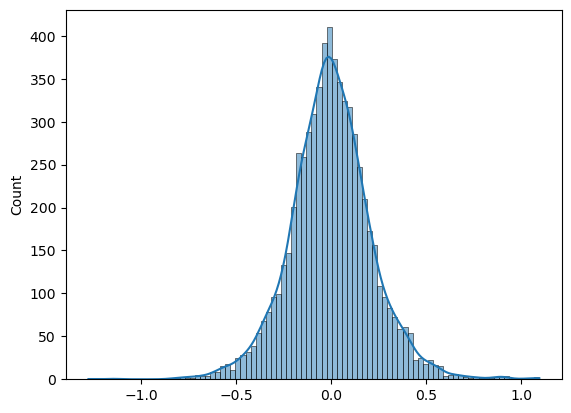

In [20]:
# let's evaluate the distribution of the errors: they should be fairly normally distributed
sns.histplot(y_test['price'] - preds, kde=True)

plt.show()

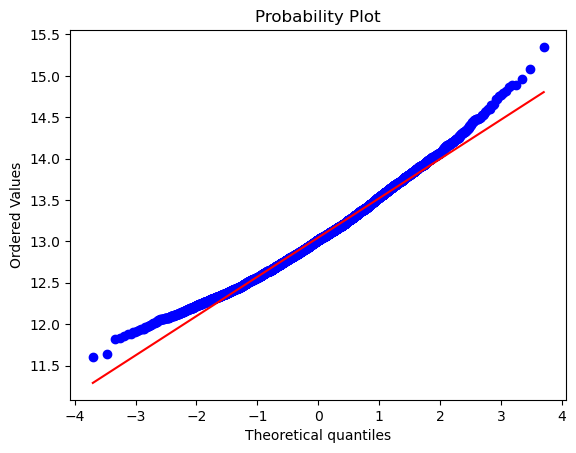

In [21]:
import scipy.stats as stats

res = stats.probplot(preds, plot=plt)
plt.show()

### Save the model

In [22]:
joblib.dump(regressor, 'linear_regression.joblib')

['linear_regression.joblib']

# Hyper parameter tuning

In [23]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [24]:
def test(models, X_train, X_test, y_train, y_test, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [25]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [26]:
test(models, X_train, X_test, y_train, y_test)

,OLS,Lasso,Ridge
0,0.829322,0.000000,0.829310
1,0.831266,-0.000027,0.831185


## Grid Search

In [27]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.001, 0.0005]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X_train, y_train).best_estimator_,}

In [28]:
test(models2, X_train, X_test, y_train, y_test)

,OLS,Lasso,Ridge
0,0.829322,0.828723,0.793935
1,0.831266,0.830609,0.793373
